Name: Stephen Lacey

Student ID: 21165335

## Task 2

Open a new Jupyter notebook and name it etivity1.ipynb. In your own notebook, perform EDA with the bank data set by following the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb”.


## Attribute Information:

### Input variables:
#### Bank client data:
    1. age (numeric)  
    2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
    3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
    4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
    5. default: has credit in default? (categorical: 'no','yes','unknown')  
    6. housing: has housing loan? (categorical: 'no','yes','unknown')  
    7. loan: has personal loan? (categorical: 'no','yes','unknown')  
#### Related with the last contact of the current campaign:
    8.  contact: contact communication type (categorical: 'cellular','telephone')  
    9.  month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
    10.  day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
    11.  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
#### Other attributes:
    12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
    13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
    14. previous: number of contacts performed before this campaign and for this client (numeric)  
    15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
#### Social and economic context attributes
    16. emp.var.rate: employment variation rate - quarterly indicator (numeric)  
    17. cons.price.idx: consumer price index - monthly indicator (numeric)  
    18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
    19. euribor3m: euribor 3 month rate - daily indicator (numeric)  
    20. nr.employed: number of employees - quarterly indicator (numeric)  

## Output variable (desired target):  
    21. y - has the client subscribed a term deposit? (binary: 'yes','no')  
    

### Imports

In [74]:
# Use the same python modules that were used in the totorial

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [75]:
df = pd.read_csv('./bank.csv')

# Hint - open bank.csv with Excel and take a look at it.

## Examine the data a bit

In [76]:
# Print first 5 rows of the dataframe
df.head(5)

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  
0         no  
1         no  
2         no  
3         no  
4         no

In [77]:
# Print last 5 rows of the dataframe
df.tail(5)

age           job  marital  education default  balance housing loan  \
1995  20.0       student   single        NaN      no     2785      no   no   
1996  28.0        admin.   single  secondary      no      127      no   no   
1997  81.0       retired  married    primary      no     1154      no   no   
1998  46.0      services  married    primary      no     4343     yes   no   
1999  40.0  entrepreneur  married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes

## Etivity Objective 1:

### Formulate a particular question that might be interesting to answer by exploring this dataset (approx. 50 words in a markdown cell).
    

Looking at the data I can see that there are two interesting numeric fields, "balance" and "age".   
I believe it will be interesting to see whether the education level achieved and balance or age are significant at all or if they have no influence over whether there is a positive outcome.

## Etivity Objective 2:
### Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

### Look at numerical attributes

In [123]:
# Print statistical summary for all numerical attributes
df.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

### Look for correlations

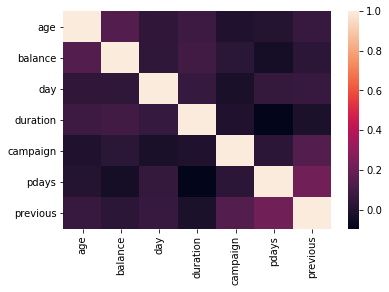

In [124]:
#correlation matrix
sns.heatmap(df.corr());

#### Correlation analysis
There does not see to be much of a correaltion betweent e numerical attributes
There are a few that show some weak correlations, ie. age, balance, duration and previous so, I will examine these further

### Examing pairwise correlations

In [125]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','duration','previous']].dropna())
plt.show()

### Look at some of the categorical elements

In [126]:
def examine_cat(data, name):
    """ Function to take a dataset and examine some categorical properties of it
    
    Parameters
    ----------
    Inputs: data - the dataset to examine
            name - the attribute in the dataset to examine

    Returns
    -------
            n/a
            
    """
    print ("Examining the categorical element {0}".format(name))
    d = data[name].value_counts()
    print (d)                   ## This prints the name / count pair by name for the item we're examining
    cat = d.sum()               ## Total of categorised elements
    ## cnt = data[name].count() ## Counting the element itself is not counting the blank ones. 
    nulls = data[name].isnull().sum(axis = 0) ## Count the nulls instead
    print ("Total count = {0}, categorised = {1}, uncategorised = {2}\n".format(cat+nulls, cat, nulls))
    
examine_cat(df, 'job')
examine_cat(df, 'education')
examine_cat(df, 'marital')
examine_cat(df, 'default')
examine_cat(df, 'housing')
examine_cat(df, 'loan')
examine_cat(df, 'contact')
examine_cat(df, 'month')

Examining the categorical element job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64
Total count = 2000, categorised = 1990, uncategorised = 10

Examining the categorical element education
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64
Total count = 2000, categorised = 1896, uncategorised = 104

Examining the categorical element marital
married     1111
single       674
divorced     215
Name: marital, dtype: int64
Total count = 2000, categorised = 2000, uncategorised = 0

Examining the categorical element default
no     1985
yes      15
Name: default, dtype: int64
Total count = 2000, categorised = 2000, uncategorised = 0

Examining the categorical element housing
no     1037
yes     963
Name: housing, dtype: int64
Total count = 2000, categorised = 

### Etivity Objective 2 conclusions:

There does not seem to be much of a correlation between the numerical attributes. There are a few that show some weak correlations, i.e. age, balance, duration and previous so, I examined these further.

The pairwise correlations on the elements did show liner correlation between age and call duration - which can be explained more from a social aspect, i.e. young people have less money or may be ineligible for investing, whereas older people have more time to spend on the phone and more money.  The age versus balance graph is surprisingly flat, countering my intuition that people would have a greater balance the older they were.   

The categorical data seems to be well gathered, with good groupings and few null values.  
Combining the numerical and categorical data will probably be useful for assessing positive outcomes for future campaigns, for instance focusing on candidates by age, education level or even marital status might be useful.

## Etivity Objective 3:
### Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).


In [127]:
### Distribution Analysis for numerical elements

Numerical analysis of the element: age



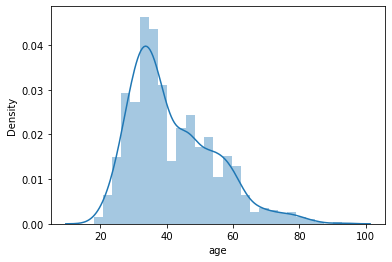

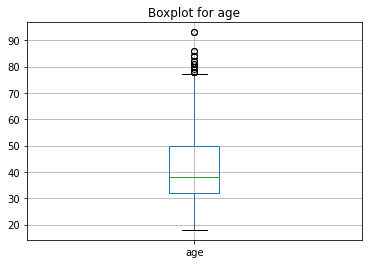

kurtosis for age is 0.38693484705416514
skew for age is 0.853276697565762

Numerical analysis of the element: balance



kurtosis for balance is 231.27384071992378
skew for balance is 11.452966441783499



In [128]:
from scipy.stats import kurtosis
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')


# Define a function to analyse the data consistently
def num_analysis(data, name):
    """ Function to take a dataset and examine some numerical properties of it
    
    Parameters
    ----------
    Inputs: data - the dataset to examine
            name - the attribute in the dataset to examine

    Returns
    -------
            n/a 
    """
    
    print("Numerical analysis of the element: {0}\n".format(name))
    # set the  dataset
    dataset = data[name].dropna()
    
    sns.distplot(dataset);
    plt.show()
    
    #skewness and kurtosis
    ##print("Skewness: %f" % dataset.skew())
    ##print("Kurtosis: %f" % dataset.kurt())
    
    dataset.hist(bins=50)
    plt.xlabel(name)
    plt.ylabel('count of ' + name)
    plt.title("Histogram for " + name)
    plt.show()
    
    data.boxplot(column=name)
    plt.title("Boxplot for " + name)
    plt.show()    
    
    # Calculate the kurtosis
    print("kurtosis for {0} is {1}".format(name,kurtosis(dataset, axis=0, bias=True)))

    # Calculate the skewness
    print("skew for {0} is {1}\n".format(name,skew(dataset, axis=0, bias=True)))    
    
num_analysis(df, "age")
num_analysis(df, "balance")
    

### Etivity Objective 3 Conclusion

Looking at the analysis for age I can see that there is almost a gaussian distribution, however the skew for age is 0.853276697565762 meaning it is skewed to the left.  The mean age is 41.75, with the median at 38. We are drawing 50% of our samples from people aged between 32 and 50. There are quite a few outliers at the high end of the age range, however, surprisingly, the kurtosis for the age graph is only 0.38693484705416514 indicating that the distribution tails off fairly well and my in fact have shorter tails than expected.   This may be due to the fact that there are no candidates under 18 considered so there are no outliers under 18 on the left of the graph.

The histogram for balance shows an alarming number of people have balances close to zero. The distribution is reminiscent of a negative exponential one. The corresponding skew is a massive 11, as there is no balance to the data, likewise the kurtosis for balance is a whopping 231, again showing that there is nothing close to a gaussian distribution represented here. There are a significant number of outliers, indicating that some people do have significant balances.  

## Etivity Objective 4:

### Generate two plots with the combined distribution of attributes and draw conclusions from them (approx. 150 words in a markdown cell).
    

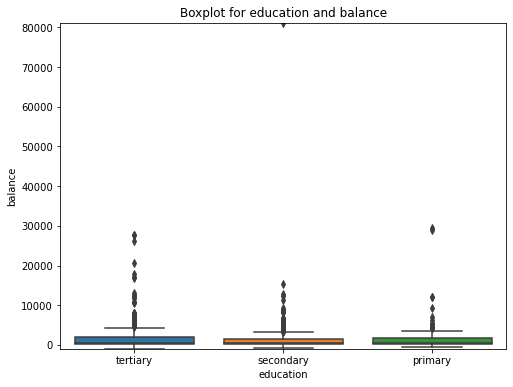

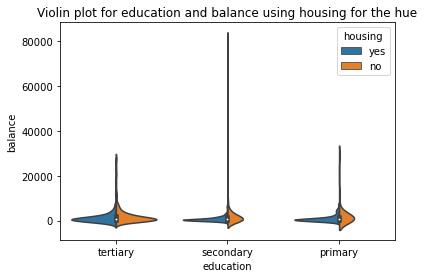

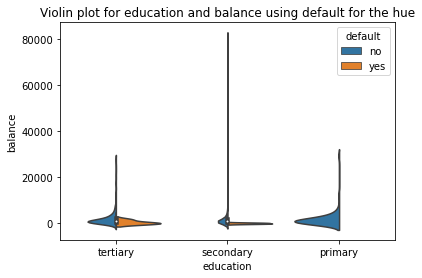

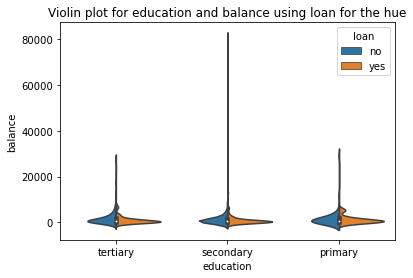

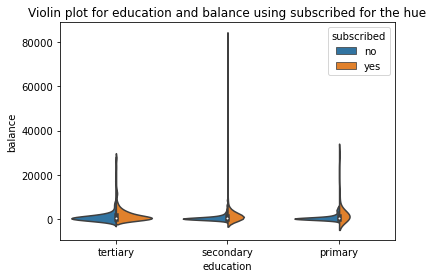

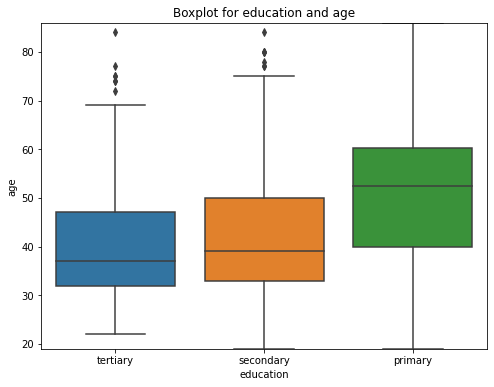

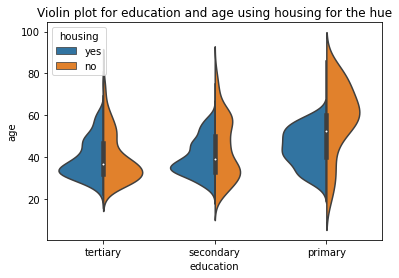

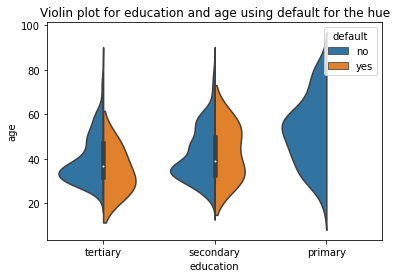

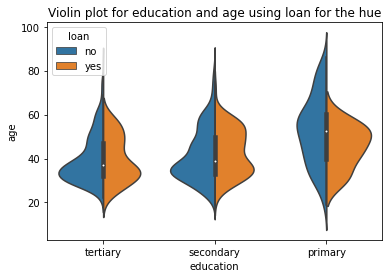

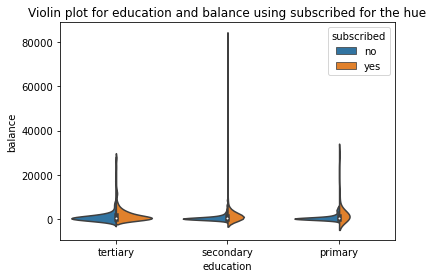

In [130]:
def compareCatToNum(data, cat_name, value_name, hue_name, show_box):
    """ 
        Function to compare data by category.
        Function produces a box plot and a violin plot
        
    
    Parameters
    ----------
    Inputs: data - the dataset to examine
            cat_name - the text attribute in the dataset to examine
            value_name - the numeric attribute in the dataset to examine
            hue_name - a property of the data which can only have 2 values to colour the left and right side of the violin plot

    Returns
    -------
            n/a     
    """
    
    data_drop_na = data.dropna() ## Drop na as they can be troublesome
    
    ## create a reporting dataset from the value, category and hue
    dataset = pd.concat([data_drop_na[value_name], data_drop_na[cat_name], data_drop_na[hue_name]], axis=1)
    
    ## Only show the boxplot if the show_box variable is true, as we will call this multiple times 
    ## for the came categorical element for the violin plots, and we don't want this repeated
    if show_box:
        ## Create a reporting figure
        f, ax = plt.subplots(figsize=(8, 6))
        fig = sns.boxplot(x=cat_name, y=value_name, data=dataset)
        fig.axis(ymin=data_drop_na[value_name].min(), ymax=data_drop_na[value_name].max()); ## set the y-axis bounds
        plt.title("Boxplot for " + cat_name + " and " + value_name) ## set a title
        plt.show()
    
    ## Now do a violin plut for this data, separated by hue
    sns.violinplot(data=dataset, x=cat_name, y=value_name, hue=hue_name, split=True)
    plt.title("Violin plot for " + cat_name + " and " + value_name + " using " + hue_name + " for the hue" )
    plt.show()


### Look at the balance versus come categorical fields    
compareCatToNum(df,"education","balance","housing", True)
compareCatToNum(df,"education","balance","default", False)
compareCatToNum(df,"education","balance","loan", False)
compareCatToNum(df,"education","balance","subscribed", False)

### Look at the age versus come categorical fields    
compareCatToNum(df,"education","age","housing", True)
compareCatToNum(df,"education","age","default", False)
compareCatToNum(df,"education","age","loan", False)
compareCatToNum(df,"education","balance","subscribed", False)


#### Note, the plots are hard to read because of outliers, let's remove them and go again

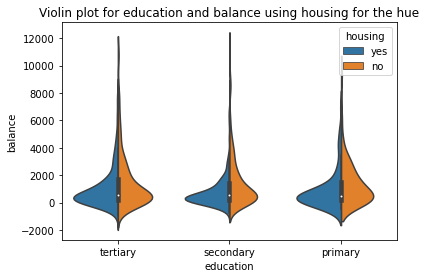

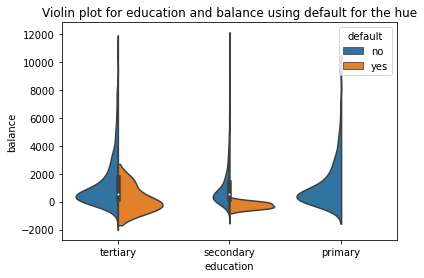

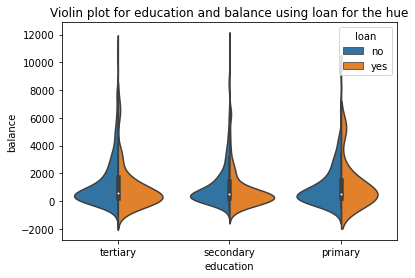

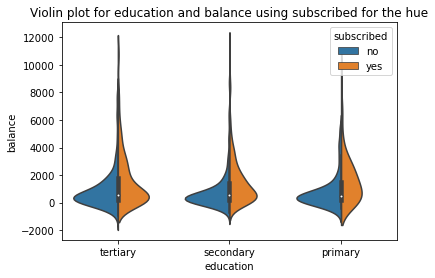

In [131]:
import scipy.stats as stats

def remove_outliers(data,column):
    """ Take a dataset and calculate the z scores for a column
        Remove any values not within 3 standard deviations of the value
    
    Parameters
    ----------
    Inputs: data - the dataset to examine
            column - the  attribute in the dataset to remove outlier for

    Returns
    -------
            filtered_entries: the filtered set """

    ## Create a column with the z-scores
    z_scores = stats.zscore(data[column])
    ## Get the absolute value
    abs_z_scores = np.abs(z_scores)
    ## Add the abs scores as a column
    data['abs_z_scores'] = abs_z_scores
    ## Now use that column to filter the data
    filtered_entries = data.loc[data['abs_z_scores'] < 3]
    ## Finally return the filtered data
    return filtered_entries

## Now remove balance outliers and try again
df_dropna = df.dropna() ## drop na as a single na will make all zscores nan

df_no_outliers = remove_outliers(df_dropna,"balance")

compareCatToNum(df_no_outliers,"education","balance","housing", True)
compareCatToNum(df_no_outliers,"education","balance","default", False)
compareCatToNum(df_no_outliers,"education","balance","loan", False)
compareCatToNum(df_no_outliers,"education","balance","subscribed", False)


#### Interestingly, the distribution of subscribed clients is quite even across all 3 educational levels regardless of balance

#### Now see if there might be an interesting relationship between age, education and subscribed

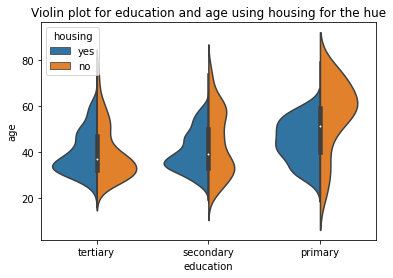

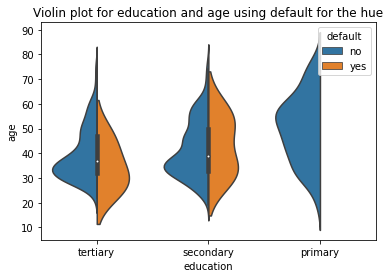

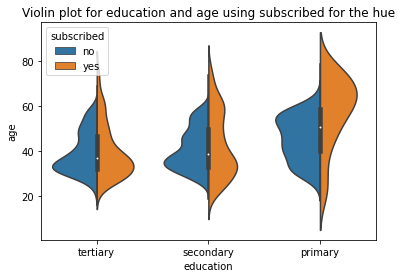

In [132]:
### Try again with age
df_dropna = df.dropna() ## drop na as a single na will make all zscores nan

df_no_outliers = remove_outliers(df_dropna,"age") ## Now remove age outliers and try again

compareCatToNum(df_no_outliers,"education","age","housing", True)
compareCatToNum(df_no_outliers,"education","age","default", False)
compareCatToNum(df_no_outliers,"education","age","loan", False)
compareCatToNum(df_no_outliers,"education","age","subscribed", False)


### Etivity Objective 4 Conclusion

I set out to see if there may be a relationship between the balance, age, education and subscribe attributes.  

By examining the relationships using boxplots and violin plots I could see that there were a number of outliers that were making the graphs difficult to interpret.  

I removed the outliers and replotted the data. I found that there doesn't seem to be any strong relationship between education, balance and clients who subscribed. There are small differences, but nothing significant.  

I next looked at age, education and whether a person subscribed. This yielded a much more interesting result. There are clear indications that people with primary education invest later in life (55-70), whereas people with tertiary education invest when they are much younger (35-45). People with a secondary education exhibit a combination of these behaviors in a "double bump".  

I believe that the relationship between age, education and subscribing could be used for a targeted sales campaign.